# Classifying Patients Based on Interviews

## Dataset 1: Simulated Medical Exams

* [Data Paper](https://www.nature.com/articles/s41597-022-01423-1)
* [Dataset](https://springernature.figshare.com/articles/dataset/Collection_of_simulated_medical_exams/16550013?backTo=%2Fcollections%2FA_dataset_of_simulated_patient-physician_medical_interviews_with_a_focus_on_respiratory_cases%2F5545842&file=30598530)

Cases were divided into the following categories:

- Respiratory cases (designated “RES”)
- Musculoskeletal cases (designated “MSK”)
- Cardiac cases (designated “CAR”)
- Dermatological case (designated “DER”)
- Gastrointestinal cases (designated “GAS”)

## Dataset 2: Depression: Twitter Dataset + Feature Extraction

* [Dataset](https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media)

## Model

Like BERT, RoBERTa is “bidirectional,” meaning it considers the context from both the left and the right sides of a token, rather than just the left side as in previous models. This allows RoBERTa to better capture the meaning and context of words in a sentence, leading to improved performance on a variety of NLP tasks. It has achieved state-of-the-art performance on several benchmarks, making it a powerful tool for NLP practitioners.


In [327]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [328]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import random
# nltk.download('omw-1.4')
# nltk.download('punkt_tab')
nltk.download("stopwords")
# from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [329]:
df = pd.DataFrame(columns=['id', 'label', 'text', 'len'])
for dirname, _, filenames in os.walk('./datasets/Data/Clean Transcripts'):
    for i, filename in enumerate(filenames):
        with open(os.path.join(dirname, filename), encoding="iso8859-1") as f:
            try:
                text_array = f.read()
                label = 1 if filename[0:3] == "RES" else 0
                df.loc[i] = [int(filename[3:7]), label, text_array.strip(), len(text_array.strip())]
            except Exception as e:
                print(filename, e)
df.sample(10)

,id,label,text,len
205,13,0,"D: How may I help you?\n\nP: Hi, I'm here beca...",8790
209,176,1,D: How may I help you? \n\nP: I um. I just hav...,6942
2,1,0,D: What brings you in today?\n\nP: I've just b...,5431
76,37,0,D: How may I help you?\n\nP: Yeah I just came ...,9173
140,86,1,"D: What brings you in?\n\nP: Yeah, so I just c...",8011
257,172,1,D: What brings you in today?\n\nP: So two days...,6226
265,211,1,D: So what brings you to the clinic today?\n\n...,7515
112,137,1,"D: So what uh, brings you here today?\n\nP: I ...",7005
144,119,1,D: So what brings you in here today?\n\nP: Um ...,7422
221,216,1,D: So I understand you're having some chest ti...,8188


In [330]:
train = df

<Axes: xlabel='label', ylabel='count'>

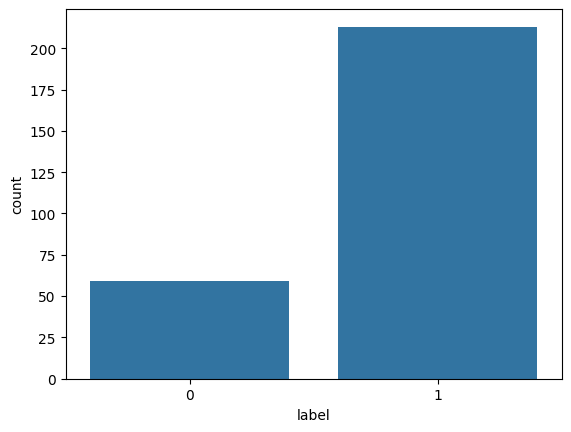

In [331]:
sns.countplot(data=train, x="label")

In [332]:
# lemma = nltk.WordNetLemmatizer()
# text_list=[]
# for text in data.post_text:
#     description = re.sub("[^a-zA-Z]"," ", text)
#     description = description.lower()
#     description = nltk.word_tokenize(text)
#     # description = [word for word in text if word not in set(stopwords.words("english"))] Done in vectorize below
#     description = [lemma.lemmatize(word) for word in text]                                # lemmatize the words
#     description = "".join(description)                                                    # put the words back into a single blob
#     text_list.append(description)

In [333]:
def to_sparse(x):
    return x.toarray()

# Gaussian Naive Bayes algorithm - probabilistic approach, assuming that the
# features follow a normal (Gaussian) distribution.
# GaussianNB(var_smoothing=0.03)
calibrated_nb = CalibratedClassifierCV(GaussianNB(), method='sigmoid', cv=5)

model = make_pipeline(
    # Convert a collection of text documents to a matrix of token counts.
    CountVectorizer(max_features=10240, stop_words="english"),
    # Transform the data into a sparse matrix for the next stem
    FunctionTransformer(to_sparse, accept_sparse=True),
    calibrated_nb,
)

In [334]:
x_train, x_test, y_train, y_test = train_test_split(train.text, train.label, test_size=0.3, random_state=int(9216*random.random()))
# print(type(x_train), type(y_train))
model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=10240, stop_words='english')),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function to_sparse at 0x143d41a80>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(cv=5, estimator=GaussianNB()))])

In [335]:
model.score(x_train, y_train)

1.0

In [336]:
confusion_matrix(y_test, model.predict(x_test))

array([[13,  4],
       [ 0, 65]])

## Save the Model

In [337]:
joblib.dump(model, 'gaussian_nb_model.joblib')

['gaussian_nb_model.joblib']

# Predict

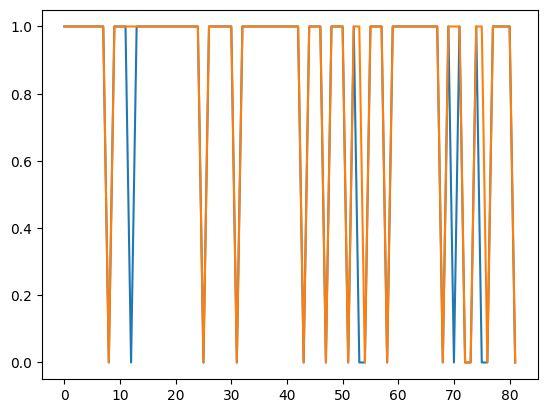

array([[0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.90363634, 0.09636366],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.25879937, 0.74120063],
       [0.90363634, 0.09636366],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.09590876, 0.90409124],
       [0.

In [ ]:
loaded_model = joblib.load('gaussian_nb_model.joblib')
predictions = loaded_model.predict(x_test)
proba = loaded_model.predict_proba(x_test)
plt.plot(np.asarray(y_test))
plt.plot(np.array(predictions))
plt.show()
display(proba)